In [1]:
import sys, os
#sys.path.append(os.path.abspath("../src"))

In [2]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
SRC_DIR = os.path.join(BASE_DIR, "src")
sys.path.append(SRC_DIR)


In [3]:
import matplotlib.pyplot as plt
from utils.io_utils import ensure_dir, read_jsonl, sample_jsonl
from reporting.explore_stats_sumry import quick_stats, show_longest_docs, summarize_dataset, summarize_dataset_exclusive
from detectors.html_detect import show_html_examples
from detectors.code_ASCII_detect import detect_non_ascii
from detectors.language_detect import sample_language_distribution
from reporting.viz_plots import plot_summary_percentage


# Read file

In [4]:
raw_data_path='../data/raw'
raw_file=os.path.join(raw_data_path, "mainpipe_data_v1.jsonl") 

In [5]:
raw_file

'../data/raw/mainpipe_data_v1.jsonl'

# Reading top few line and  random sample

In [6]:
read_jsonl(raw_file, n=5)

{'text': 'In the never ending battle to rid Alaska of its Permanent Fund, strange bedfellows from the Alaska corporate community, a famous foundation and leaders from both parties are anxious to convince ordinary Alaskans that tapping the fund must be the first step. It should be the last and only after other sources of revenue are fully explored. As Steve Heimel puts " I agree that a fiscal solution should involve the Permanent Fund earnings, but last, not first. First readjusting the oil tax, other revenue sources, Constitutional Budget Reserve, cuts, and only after those should the Fund\'s earnings be considered. These people are willing to give political cover to the Republicans, who have always hated the Permanent Fund anyway. Is it going to remain the third rail of Alaska politics? Probably".', 'url': None}
{'text': '» Jackpot | Deutsche Online Casinos und Casino Spiele\nBeim MrGreen Casino wurde am zweiten Weihnachtstag vermeldet, dass sich ein glücklicher Spieler beim Mega Fort

In [7]:
sample_jsonl(raw_file, n=20)

---- Sampled Rows ----
{'text': '— Alternative Back Care Clinic, PC.\nfrom infants to senior citizens.\nto improve the health of your body, mind, and soul .\nAlternative Back Care Clinic, PC (ABC Clinic, PC) is a chiropractic clinic, owned by Dr. Paul Bunkers, a graduate of Palmer College of Chiropractic in Davenport, Iowa. We specialize in conservative, alternative health care focusing on chiropractic, nutritional, and rehabilitative services. We work hard on dealing with simple and complex musculo-skeletal problems to help the patient get back to proper function and a pain-free lifestyle as soon as possible. We focus on "treating the cause, not just the pain". Your health care should be as easy as ABC — Alternative Back Care Clinic, PC.\nBecause Dr. Bunkers LOVES his job!\nneck and back problems, headaches, joint problems of the arms and legs such as shoulders, knees, etc.\n© 2019 Alternative Back Care, PC.', 'url': 'http://drpaulbunkers.com/'}
-------------
{'text': 'According to re

# Stats on the input raw data

In [8]:
quick_stats(raw_file, sample_size=25000)

FILE OVERVIEW
File size: 439.23 MB (0.43 GB)
Total lines in file: 269,378
Sampled (limit): 25,000
------------

KEYS
Most common keys: [('text', 25000), ('url', 25000)]
------------

TEXT LENGTH STATS
Avg length: 1589.76
Median length: 752.00
10th percentile: 187.00
90th percentile: 3211.00
Most entries are multi-paragraph documents (median text size>300).
Good for LLM pretraining (rich context, natural text).
Max length: 178482
raw HTML pages,  code dumps / stack traces, JSON logs or config files, full chat transcripts, base64 or encoded junk.
 These must be  filtered or trim these before LLM pretraining
Min length: 2
------------

NOISE INDICATORS
Empty texts: 0 (0.00%)
Short < 100 chars: 958 (3.83%)
Only a small fraction of trivial/low-value text.  Dataset likely contains substantial natural text, not noise
------------

Done.


### Longest documents/samples

In [9]:
show_longest_docs(raw_file, n=2)


=== Longest Doc #1 (372627 chars) ===

function emitFiles(resolver, host, targetSourceFile, emitOnlyDtsFiles) {
        // emit output for the __extends helper function
        var extendsHelper = "\nvar __extends = (this && this.__extends) || function (d, b) {\n    for (var p in b) if (b.hasOwnProperty(p)) d[p] = b[p];\n    function __() { this.constructor = d; }\n    d.prototype = b === null ? Object.create(b) : (__.prototype = b.prototype, new __());\n};";
        var assignHelper = "\nvar __assign = (this && this.__assign) || Object.assign || function(t) {\n    for (var s, i = 1, n = arguments.length; i < n; i++) {\n        s = arguments[i];\n        for (var p in s) if (Object.prototype.hasOwnProperty.call(s, p))\n            t[p] = s[p];\n    }\n    return t;\n};";
        // emit output for the __decorate helper function
        var decorateHelper = "\nvar __decorate = (this && this.__decorate) || function (decorators, target, key, desc) {\n    var c = arguments.length, r = c <

### show html in input data

In [10]:
show_html_examples(raw_file, n=2)


=== HTML DOC ===

<p>Ubuntu 9.10</p>

<p>Silly question time: When the clamav-freshclam service is running, how often is clamav checking for updates? Or do I have to manually run freshclam via a cronjob? </p>

<blockquote>
<p>how often is clamav checking for updates?</p>
</blockquote>
<p>Unless you setup a cronjob it will not check for updates.</p>
<blockquote>
<p>Do I have to manually run freshclam via a cronjob?</p>
</blockquote>
<p>The purpose of a cronjob is to automate the process. You can decide to run it in the following:</p>
<pre><code>/etc/cron.daily
/etc/cron.hourly
/etc/cron.weekly
/etc/cron.monthly 
</code></pre>
<p>I recommend <strong>cron.daily</strong> and set it up via a shell script.</p>
<pre><code>sudo gedit /etc/cron.daily/freshclam.sh
</code></pre>
<p>add the lines:</p>
<pre><code>#!/bin/sh
/usr/bin/freshclam --quiet
</code></pre>
<p>This will now run with all your other cron.daily jobs</p>
<p>Save and exit</p>
<pre><code>sudo chmod 755 /etc/cron.daily/freshclam.sh

### Detect non-ASCII that are not (0-9,a-z, A-Z and some basic symbols)
This includes non european languages french, hindi, chinese, japanese that does not involve ascii; however, may not include many European languages.

In [11]:
detect_non_ascii(raw_file, sample_size=25000) ##total length= 269378

Likely non-English: 6679/25000 = 26.72%


### Detect all languages

In [12]:
langs = sample_language_distribution(raw_file, sample_size=25000)
total = sum(langs.values())

for lang, count in langs.items():
    pct = (count / total) * 100
    print(f"{lang}: {pct:.2f}%")

EN: 91.89%
DE: 3.83%
ES: 3.09%
TL: 0.11%
LA: 0.57%
YO: 0.09%
NL: 0.06%
FR: 0.02%
PL: 0.01%
RO: 0.01%
IT: 0.03%
DA: 0.04%
NB: 0.00%
NN: 0.04%
EO: 0.03%
MI: 0.01%
ZU: 0.01%
ST: 0.01%
CS: 0.00%
SL: 0.00%
ID: 0.00%
SV: 0.02%
AF: 0.01%
CA: 0.01%
XH: 0.02%
KO: 0.00%
CY: 0.02%
PT: 0.01%
GA: 0.01%
UNKNOWN: 0.02%
TS: 0.01%
SW: 0.00%
ZH: 0.01%
SO: 0.01%
SQ: 0.00%
IS: 0.00%


# Summaries the composition of the raw  data

Counter({'GOOD_ENGLISH': 14256, 'HTML': 6097, 'NON_ENGLISH': 2053, 'CODE_HEAVY': 289})
{'HTML': 24.388, 'GOOD_ENGLISH': 57.023999999999994, 'NON_ENGLISH': 8.212, 'CODE_HEAVY': 1.1560000000000001}


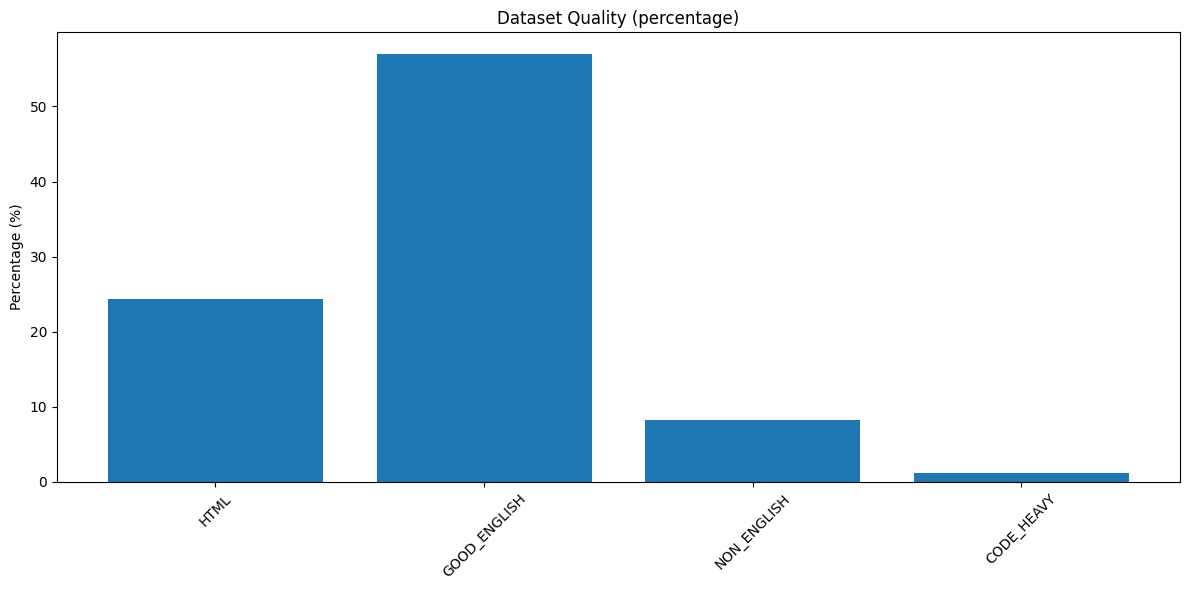

In [13]:
summary, summary_pct = summarize_dataset(raw_file, sample_size=25000)
print(summary)
print(summary_pct)
fig=plot_summary_percentage(summary_pct)
plt.show()

The above categories may have some overlaping as some documents may be classifified in many categories.
such has a document that is code heavy may also be html or non english.

# Exclusive classification and compoition summary

Counter({'GOOD_ENGLISH': 14307, 'HTML': 5991, 'SHORT_ENGLISH': 2347, 'NON_ENGLISH_LANG': 2044, 'CODE_HEAVY': 311})
{'HTML': 23.964, 'GOOD_ENGLISH': 57.228, 'NON_ENGLISH_LANG': 8.176, 'SHORT_ENGLISH': 9.388, 'CODE_HEAVY': 1.244}


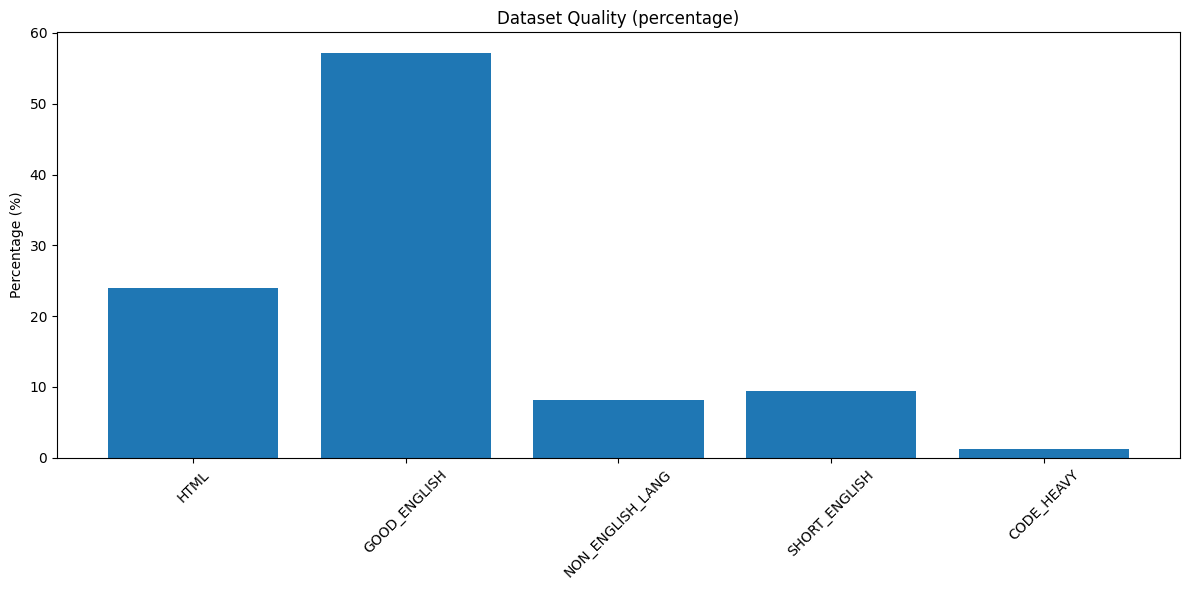

In [15]:
summary1, summary_pct1 = summarize_dataset_exclusive(raw_file, sample_size=25000)
print(summary1)
print(summary_pct1)

#plot_summary_percentage(summary_pct1)
fig=plot_summary_percentage(summary_pct1)
fig.savefig("../figures/raw_data_summary.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.show()